In [9]:
from reactionmodel.model import Species, Reaction, Model
import numpy as np
from numba import jit

X = Species('X')

def k(t):
    return np.array([t])

r = Reaction([X], [], k=k)

m = Model([X], [r])

In [ ]:
X = Species('X')
Y = Species('Y')

#def k(t):
#    return np.array([t])

rs = [
    Reaction([X], [], k='1'),
    Reaction([Y], [], k='2')
]

m = Model([X], [r])

In [21]:
from scipy.integrate import solve_ivp

t = np.linspace(0.0, 5.0, 51)


result = solve_ivp(
    m.get_dydt(jit=False),
    [0.0, 5.0],
    [1000],
    t_eval=t
)

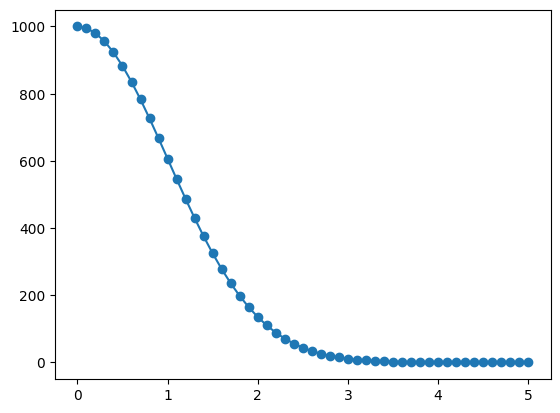

In [25]:
import matplotlib.pyplot as plt

ax = plt.subplot()

ax.scatter(result.t, result.y.T)

y = 1000*np.exp(-1/2 * t**2)

ax.plot(t, y)

In [27]:
y2 = 1000*np.exp(-t)
y2

array([1000.        ,  904.83741804,  818.73075308,  740.81822068,
        670.32004604,  606.53065971,  548.81163609,  496.58530379,
        449.32896412,  406.56965974,  367.87944117,  332.8710837 ,
        301.19421191,  272.53179303,  246.59696394,  223.13016015,
        201.89651799,  182.68352405,  165.29888822,  149.56861922,
        135.33528324,  122.45642825,  110.80315836,  100.25884372,
         90.71795329,   82.08499862,   74.27357821,   67.20551274,
         60.81006263,   55.02322006,   49.78706837,   45.04920239,
         40.76220398,   36.8831674 ,   33.37326996,   30.19738342,
         27.32372245,   24.72352647,   22.37077186,   20.24191145,
         18.31563889,   16.5726754 ,   14.99557682,   13.56855901,
         12.2773399 ,   11.10899654,   10.05183574,    9.0952771 ,
          8.22974705,    7.44658307,    6.737947  ])

In [28]:
rng = np.random.default_rng()

In [51]:
x = rng.random(100000)
x = np.log(1/x)

In [42]:
z = rng.exponential(1.0, 100000)

array([<Axes: title={'center': 'exp'}>, <Axes: title={'center': 'log'}>],
      dtype=object)

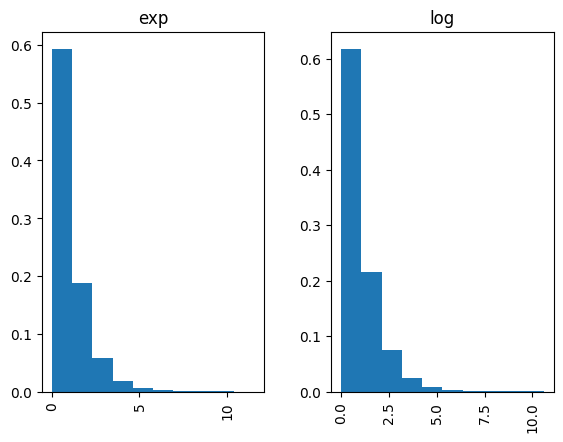

In [48]:
import pandas as pd
df = pd.DataFrame({'rand':list(np.log(1/x))+list(z), 'method':['log' for _ in x] + ['exp' for _ in z]})
#ax = plt.subplot()
df.hist(density=True, by='method')

In [56]:
x.mean(), x.var()

(1.0009947717233898, 0.9939312037121493)

In [55]:
z.mean(), z.var()

(0.9970411081166741, 0.9960569685935127)